In [1]:
from os import path

from astroquery.vizier import Vizier
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline

from comoving_rv.db import Session, Base, db_connect
from comoving_rv.db.model import (Run, Observation, TGASSource, SimbadInfo,
                                  SpectralLineInfo, SpectralLineMeasurement, PriorRV)
from comoving_rv.db import get_best_rv

In [2]:
base_path = '/Volumes/ProjectData/gaia-comoving-followup/'
db_path = path.join(base_path, 'db.sqlite')
engine = db_connect(db_path)
session = Session()

In [3]:
observations = session.query(Observation).filter(Observation.prior_rv_id == None).all()

In [13]:
done = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
for obs in observations:
    if obs.id in done:
        continue
        
    print(obs)
    result = get_best_rv(obs)
    if result is not None:
        print("\t", result[0])
        rv, rv_err, rv_qual, rv_bibcode, rv_source = result

        prv = PriorRV(rv=rv*u.km/u.s, err=rv_err*u.km/u.s,
                      qual=rv_qual, bibcode=rv_bibcode,
                      source=rv_source)
        obs.prior_rv = prv
        session.add(prv)
        session.commit()
        
        done.append(obs.id)
    
    done.append(obs.id)

<Observation 611-2735 [HIP 55377], n1.0074.fit, mdm-spring-2017>
<Observation 1024-3327 [HD 88629], n1.0075.fit, mdm-spring-2017>
<Observation 1024-1006 [TYC 3436-561-1], n1.0076.fit, mdm-spring-2017>
<Observation 1093-1123 [TYC 3814-1433-1], n1.0077.fit, mdm-spring-2017>
<Observation 1093-4773 [TYC 3813-1296-1], n1.0078.fit, mdm-spring-2017>
<Observation 324-5 [TYC 3836-882-1], n1.0079.fit, mdm-spring-2017>
<Observation 324-3271 [TYC 3837-246-1], n1.0080.fit, mdm-spring-2017>
<Observation 942-882 [HD 94913], n1.0081.fit, mdm-spring-2017>
<Observation 942-5467 [HIP 55573], n1.0082.fit, mdm-spring-2017>
<Observation 746-962 [TYC 3834-149-1], n1.0083.fit, mdm-spring-2017>
<Observation 746-590 [HD 233948], n1.0084.fit, mdm-spring-2017>
<Observation 1224-1952 [TYC 3462-4-1], n1.0085.fit, mdm-spring-2017>
<Observation 1224-1360 [TYC 3466-148-1], n1.0086.fit, mdm-spring-2017>
<Observation 1221-1357 [TYC 3462-1683-1], n1.0087.fit, mdm-spring-2017>
<Observation 1221-9831 [HD 234029], n1.0088.f

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -22.0
<Observation 729-563 [HD 131748], n1.0115.fit, mdm-spring-2017>
<Observation 450-171 [HD 131604], n1.0116.fit, mdm-spring-2017>
<Observation 450-3619 [HD 131269], n1.0117.fit, mdm-spring-2017>
<Observation 1275-2081 [TYC 4987-657-1], n1.0118.fit, mdm-spring-2017>
<Observation 1275-1440 [TYC 5004-810-1], n1.0119.fit, mdm-spring-2017>
<Observation 465-186 [HD 145872], n1.0120.fit, mdm-spring-2017>
	 -23.0
<Observation 465-10446 [HD 147094], n1.0121.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation HD158067 [HD 158067], n1.0123.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation HD161817 [HD 161817], n1.0124.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 905-823 [TYC 972-1141-1], n1.0125.fit, mdm-spring-2017>
<Observation 905-5851 [TYC 1524-649-1], n1.0126.fit, mdm-spring-2017>
<Observation 1178-10597 [HD 144978], n1.0127.fit, mdm-spring-2017>
<Observation 1178-1284 [HD 144839], n1.0128.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -30.0
<Observation 473-197 [TYC 957-1120-1], n1.0129.fit, mdm-spring-2017>
<Observation 473-10585 [HD 144937], n1.0131.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 927-1418 [HD 153502], n1.0132.fit, mdm-spring-2017>
<Observation 927-860 [TYC 385-1437-1], n1.0133.fit, mdm-spring-2017>
<Observation HD155967 [HD 155967], n1.0136.fit, mdm-spring-2017>
	 -33.5
<Observation 1453-1830 [HD 246069], n2.0022.fit, mdm-spring-2017>
<Observation 1453-1738 [HD 37574], n2.0023.fit, mdm-spring-2017>
	 -4.699999809265137
<Observation 1482-8911 [HD 253079], n2.0024.fit, mdm-spring-2017>
<Observation 1482-1775 [HD 253004], n2.0025.fit, mdm-spring-2017>
<Observation 2260-9975 [HD 262096], n2.0026.fit, mdm-spring-2017>
<Observation 2260-3320 [HD 48008], n2.0027.fit, mdm-spring-2017>
	 -1.0
<Observation 2093-3350 [HD 36811], n2.0028.fit, mdm-spring-2017>
	 6.0
<Observation 2093-2985 [HD 36252], n2.0029.fit, mdm-spring-2017>
<Observation 1885-3093 [TYC 4780-232-1], n2.0030.fit, mdm-spring-2017>
<Observation 1885-2567 [TYC 5348-493-1], n2.0031.fit, mdm-spring-2017>
<Observation 2297-3405 [HD 37506], n2.0032.fit, mdm-spring-2017>
<Observation 2297-10541 [HD 

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 2016-2833 [HD 46956], n2.0034.fit, mdm-spring-2017>
<Observation 2016-10162 [TYC 5955-566-1], n2.0035.fit, mdm-spring-2017>
<Observation 2350-3509 [TYC 157-624-1], n2.0036.fit, mdm-spring-2017>
<Observation 2350-5863 [HD 53201], n2.0037.fit, mdm-spring-2017>
<Observation 2396-3588 [TYC 3387-1648-1], n2.0038.fit, mdm-spring-2017>
<Observation 2396-5552 [TYC 3764-1281-1], n2.0039.fit, mdm-spring-2017>
<Observation 2318-8462 [HD 237494], n2.0040.fit, mdm-spring-2017>
<Observation 2318-3443 [TYC 3778-712-1], n2.0041.fit, mdm-spring-2017>
<Observation 1689-9956 [HD 71226], n2.0042.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 1689-2187 [TYC 3798-641-1], n2.0043.fit, mdm-spring-2017>
<Observation 1972-8596 [HD 237660], n2.0044.fit, mdm-spring-2017>
<Observation 1972-2744 [TYC 3800-296-1], n2.0045.fit, mdm-spring-2017>
<Observation 1735-2271 [TYC 3799-1351-1], n2.0046.fit, mdm-spring-2017>
<Observation 1735-9549 [TYC 3799-1567-1], n2.0047.fit, mdm-spring-2017>
<Observation 1473-3102 [TYC 3809-1483-1], n2.0048.fit, mdm-spring-2017>
<Observation 1473-1763 [TYC 3812-640-1], n2.0049.fit, mdm-spring-2017>
<Observation 1515-3584 [HD 78249], n2.0051.fit, mdm-spring-2017>
	 47.02
<Observation 1515-1834 [TYC 3813-167-1], n2.0052.fit, mdm-spring-2017>
<Observation 2086-2974 [TYC 4131-1098-1], n2.0053.fit, mdm-spring-2017>
<Observation 2086-3995 [TYC 4141-1494-1], n2.0054.fit, mdm-spring-2017>
<Observation 2217-3648 [TYC 3822-453-1], n2.0055.fit, mdm-spring-2017>
<Observation 2217-3232 [TYC 3829-315-1], n2.0056.fit, mdm-spring-2017>
<Observation 1517-1838 [SMOH 1517-1838], n2.0057.fit, mdm-spring-2017>


/Users/adrian/anaconda/envs/comoving-rv/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SMOH 1517-1838
  (error.line, error.msg))


<Observation 1517-3828 [TYC 3819-839-1], n2.0058.fit, mdm-spring-2017>
<Observation 2308-3421 [TYC 3450-163-1], n2.0059.fit, mdm-spring-2017>
<Observation 2308-3421 [TYC 3450-163-1], n2.0060.fit, mdm-spring-2017>
<Observation 1497-1801 [HD 91158], n2.0061.fit, mdm-spring-2017>
<Observation 1497-4042 [TYC 3826-948-1], n2.0062.fit, mdm-spring-2017>
<Observation 1958-7629 [TYC 4384-1278-1], n2.0063.fit, mdm-spring-2017>
<Observation 1958-2714 [TYC 4385-504-1], n2.0064.fit, mdm-spring-2017>
<Observation 2209-5470 [TYC 4380-523-1], n2.0065.fit, mdm-spring-2017>
<Observation 2209-3218 [TYC 4369-783-1], n2.0066.fit, mdm-spring-2017>
<Observation 1789-2370 [TYC 4358-1886-1], n2.0067.fit, mdm-spring-2017>
<Observation 1789-2370 [TYC 4358-1886-1], n2.0068.fit, mdm-spring-2017>
<Observation 1737-2273 [TYC 4358-1393-1], n2.0069.fit, mdm-spring-2017>
<Observation 1737-2408 [TYC 4345-998-1], n2.0070.fit, mdm-spring-2017>
<Observation 1615-2058 [TYC 4107-116-1], n2.0071.fit, mdm-spring-2017>
<Observa

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -1.44
<Observation 1851-2499 [TYC 1995-1369-1], n2.0126.fit, mdm-spring-2017>
<Observation 1851-4674 [TYC 1995-816-1], n2.0127.fit, mdm-spring-2017>
<Observation 1434-9281 [TYC 2560-316-1], n2.0128.fit, mdm-spring-2017>
<Observation 1434-1704 [TYC 2560-121-1], n2.0129.fit, mdm-spring-2017>
<Observation 1405-1648 [TYC 3037-628-1], n2.0130.fit, mdm-spring-2017>
<Observation 1405-7726 [TYC 3033-808-1], n2.0131.fit, mdm-spring-2017>
<Observation 2281-9802 [TYC 3478-165-1], n2.0132.fit, mdm-spring-2017>
<Observation 2281-3375 [TYC 3478-168-1], n2.0133.fit, mdm-spring-2017>
<Observation 1784-2364 [HD 139691], n2.0134.fit, mdm-spring-2017>
<Observation 1784-3826 [HIP 76566], n2.0135.fit, mdm-spring-2017>
<Observation 1821-9021 [HD 133598], n2.0136.fit, mdm-spring-2017>
<Observation 1821-2435 [HD 132505], n2.0137.fit, mdm-spring-2017>
	 -15.899999618530273
<Observation 2046-2884 [HD 135102], n2.0138.fit, mdm-spring-2017>
<Observation 2046-8993 [TYC 1487-629-1], n2.0139.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 2154-10128 [HIP 78154], n2.0148.fit, mdm-spring-2017>
<Observation 1942-2737 [HD 143993], n2.0149.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 1942-2691 [TYC 956-1174-1], n2.0150.fit, mdm-spring-2017>
<Observation 1942-2691 [TYC 956-1174-1], n2.0151.fit, mdm-spring-2017>
<Observation 2342-3491 [HD 140346], n2.0152.fit, mdm-spring-2017>
	 -4.07
<Observation 2342-6570 [TYC 362-1013-1], n2.0153.fit, mdm-spring-2017>
<Observation 1828-4704 [TYC 5025-35-1], n2.0154.fit, mdm-spring-2017>
<Observation 1397-1626 [TYC 4999-135-1], n2.0155.fit, mdm-spring-2017>
<Observation 1397-1626 [TYC 4999-135-1], n2.0156.fit, mdm-spring-2017>
<Observation 1397-1879 [TYC 4995-600-1], n2.0157.fit, mdm-spring-2017>
<Observation 1617-7631 [TYC 410-152-1], n2.0158.fit, mdm-spring-2017>
<Observation 1617-2061 [TYC 407-1186-1], n2.0159.fit, mdm-spring-2017>
<Observation 1534-1889 [TYC 978-928-1], n2.0160.fit, mdm-spring-2017>
<Observation 1534-9182 [TYC 978-717-1], n2.0161.fit, mdm-spring-2017>
<Observation 2135-3072 [TYC 1521-61-1], n2.0162.fit, mdm-spring-2017>
<Observation 2135-5867 [TYC 1524-1130-1], n2.0163.fit, mdm-spring-2017>
<Observ

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


	 55.1
<Observation 2495-3799 [HD 36443], n3.0024.fit, mdm-spring-2017>
	 -7.800000190734863
<Observation 2436-3662 [HD 38479], n3.0025.fit, mdm-spring-2017>
<Observation 2436-4730 [HD 288310], n3.0026.fit, mdm-spring-2017>
<Observation 2425-3645 [HD 38589], n3.0027.fit, mdm-spring-2017>
<Observation 2425-4106 [HD 288194], n3.0028.fit, mdm-spring-2017>
<Observation 3055-5119 [TYC 4803-60-1], n3.0029.fit, mdm-spring-2017>
<Observation 3055-5048 [HD 295277], n3.0030.fit, mdm-spring-2017>
<Observation 3292-5741 [HD 53335], n3.0031.fit, mdm-spring-2017>
<Observation 3292-9300 [HD 293178], n3.0032.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 2476-3753 [TYC 156-1170-1], n3.0033.fit, mdm-spring-2017>
<Observation 2476-8643 [HD 48845], n3.0034.fit, mdm-spring-2017>
<Observation 2995-8632 [HD 47179], n3.0035.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 28.0
<Observation 2995-4900 [HD 47072], n3.0036.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 2412-3700 [TYC 752-1389-1], n3.0037.fit, mdm-spring-2017>
<Observation 2412-3626 [TYC 752-1649-1], n3.0038.fit, mdm-spring-2017>
<Observation 2561-3937 [TYC 759-1562-1], n3.0039.fit, mdm-spring-2017>
<Observation 2561-4778 [HD 51002], n3.0040.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 26.0
<Observation 2980-9290 [TYC 1348-1428-1], n3.0041.fit, mdm-spring-2017>
<Observation 2980-9290 [TYC 1348-1428-1], n3.0042.fit, mdm-spring-2017>
<Observation 3117-8859 [TYC 1360-898-1], n3.0043.fit, mdm-spring-2017>
<Observation 3117-5203 [TYC 777-1316-1], n3.0044.fit, mdm-spring-2017>
<Observation 3400-10013 [TYC 1331-1457-1], n3.0045.fit, mdm-spring-2017>
<Observation 3400-6076 [TYC 1334-104-1], n3.0046.fit, mdm-spring-2017>
<Observation HIP34511 [HD 54351], n3.0047.fit, mdm-spring-2017>
	 42.599998474121094
<Observation HIP35750 [HIP 35750], n3.0048.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation HIP36849 [HD 60319], n3.0049.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -33.92
<Observation HIP36491 [HD 59374], n3.0050.fit, mdm-spring-2017>
	 91.19999694824219
<Observation 3322-5940 [TYC 1307-254-1], n3.0051.fit, mdm-spring-2017>
<Observation 3322-5829 [TYC 1307-1436-1], n3.0052.fit, mdm-spring-2017>
<Observation HIP28671 [HD 250792], n3.0053.fit, mdm-spring-2017>
	 -190.2
<Observation HIP26828 [HD 37739], n3.0054.fit, mdm-spring-2017>
<Observation 3339-8240 [HD 48881], n3.0055.fit, mdm-spring-2017>
<Observation 3339-5890 [HD 51592], n3.0056.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 3245-5576 [TYC 3409-491-1], n3.0057.fit, mdm-spring-2017>
<Observation 3245-6482 [HD 64866], n3.0058.fit, mdm-spring-2017>
<Observation 3245-6482-1 [HD 64866], n3.0059.fit, mdm-spring-2017>
<Observation 3161-5311 [HD 62068], n3.0060.fit, mdm-spring-2017>
	 -66.47
<Observation 3161-7492 [TYC 2976-2181-1], n3.0061.fit, mdm-spring-2017>
<Observation 2869-5147 [TYC 2972-467-1], n3.0062.fit, mdm-spring-2017>
<Observation 2869-4644 [HD 65788], n3.0063.fit, mdm-spring-2017>
	 21.3
<Observation 2467-4675 [TYC 2976-147-1], n3.0064.fit, mdm-spring-2017>
<Observation 2467-3726 [HD 72206], n3.0065.fit, mdm-spring-2017>
	 45.400001525878906
<Observation 2832-4562 [HIP 39256], n3.0066.fit, mdm-spring-2017>
<Observation 2832-4582 [TYC 2973-310-1], n3.0067.fit, mdm-spring-2017>
<Observation 2432-5170 [TYC 2973-1269-1], n3.0068.fit, mdm-spring-2017>
<Observation 2432-3658 [HD 67108], n3.0069.fit, mdm-spring-2017>
<Observation 2747-4354 [HIP 38950], n3.0070.fit, mdm-spring-2017>
<Observatio

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -87.2
<Observation 2563-3941 [TYC 4130-2221-1], n3.0084.fit, mdm-spring-2017>
<Observation 2563-4013 [TYC 4131-83-1], n3.0085.fit, mdm-spring-2017>
<Observation 2817-7042 [HD 78657], n3.0086.fit, mdm-spring-2017>
<Observation 2817-4526 [TYC 4376-611-1], n3.0087.fit, mdm-spring-2017>
<Observation 3347-8162 [TYC 4387-327-1], n3.0088.fit, mdm-spring-2017>
<Observation 3347-8162 [TYC 4387-327-1], n3.0089.fit, mdm-spring-2017>
<Observation 3410-7687 [TYC 4388-474-1], n3.0090.fit, mdm-spring-2017>
<Observation 3410-6100 [HD 101364], n3.0091.fit, mdm-spring-2017>
	 5.400000095367432
<Observation 3367-6075 [HD 99318], n3.0092.fit, mdm-spring-2017>
<Observation 3367-5969 [TYC 4385-1048-1], n3.0093.fit, mdm-spring-2017>
<Observation 3192-5415 [HIP 53885], n3.0094.fit, mdm-spring-2017>
<Observation 3192-9176 [TYC 4148-1192-1], n3.0095.fit, mdm-spring-2017>
<Observation 2971-4897 [TYC 4144-344-1], n3.0096.fit, mdm-spring-2017>
<Observation 2971-4853 [TYC 4137-215-1], n3.0097.fit, mdm-spring-2017

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 3293-9712 [HIP 72620], n3.0135.fit, mdm-spring-2017>
<Observation 3399-6122 [TYC 3038-814-1], n3.0136.fit, mdm-spring-2017>
<Observation 3399-6073 [HD 124185], n3.0137.fit, mdm-spring-2017>
<Observation HIP71284 [HD 128167], n3.0139.fit, mdm-spring-2017>
	 0.6000000238418579
<Observation 3032-10135 [TYC 3473-448-1], n3.0140.fit, mdm-spring-2017>
<Observation 3032-4980 [HIP 72189], n3.0141.fit, mdm-spring-2017>
<Observation 2883-9978 [HD 234181], n3.0142.fit, mdm-spring-2017>
<Observation 2883-4668 [HD 131580], n3.0143.fit, mdm-spring-2017>
<Observation 3416-6432 [TYC 3047-1038-1], n3.0144.fit, mdm-spring-2017>
<Observation 3416-6147 [TYC 3051-1231-1], n3.0145.fit, mdm-spring-2017>
<Observation 3316-5810 [TYC 3059-825-1], n3.0146.fit, mdm-spring-2017>
<Observation 3316-5810 [TYC 3059-825-1], n3.0147.fit, mdm-spring-2017>
<Observation 2845-4588 [TYC 3056-902-1], n3.0148.fit, mdm-spring-2017>
<Observation 2845-6573 [HD 149361], n3.0149.fit, mdm-spring-2017>
<Observation 2896-

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 2499-4016 [HD 141990], n3.0155.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -4.6
<Observation 2499-3805 [HIP 76696], n3.0156.fit, mdm-spring-2017>
<Observation 2499-4016 [HD 141990], n3.0157.fit, mdm-spring-2017>
	 -4.6
<Observation 2428-10566 [TYC 2567-1332-1], n3.0158.fit, mdm-spring-2017>
<Observation 2428-10566 [TYC 2567-1332-1], n3.0160.fit, mdm-spring-2017>
<Observation 3231-6310 [TYC 2039-1254-1], n3.0161.fit, mdm-spring-2017>
<Observation 3231-5529 [TYC 2040-216-1], n3.0162.fit, mdm-spring-2017>
<Observation 3289-5732 [HD 144286], n3.0163.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 3289-9202 [TYC 2041-1645-1], n3.0164.fit, mdm-spring-2017>
<Observation 3426-6177 [TYC 2040-641-1], n3.0165.fit, mdm-spring-2017>
<Observation 3426-9781 [TYC 2037-1024-1], n3.0166.fit, mdm-spring-2017>
<Observation 2944-6119 [TYC 2037-245-1], n3.0167.fit, mdm-spring-2017>
<Observation 2944-4803 [TYC 2038-738-1], n3.0168.fit, mdm-spring-2017>
<Observation 3287-5726 [SMOH 3287-5726], n3.0169.fit, mdm-spring-2017>


/Users/adrian/anaconda/envs/comoving-rv/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SMOH 3287-5726
  (error.line, error.msg))
/Users/adrian/anaconda/envs/comoving-rv/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SMOH 3287-5726-1
  (error.line, error.msg))


<Observation 3287-5726-1 [SMOH 3287-5726-1], n3.0170.fit, mdm-spring-2017>
<Observation 3287-7304 [HD 141176], n3.0171.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 3127-5222 [TYC 2025-814-1], n3.0172.fit, mdm-spring-2017>
<Observation 3127-9173 [TYC 2024-299-1], n3.0173.fit, mdm-spring-2017>
<Observation HIP76984 [HD 140514], n3.0174.fit, mdm-spring-2017>
	 10.600000381469727
<Observation 2800-4586 [TYC 1490-814-1], n3.0175.fit, mdm-spring-2017>
<Observation 2800-4477 [TYC 1487-853-1], n3.0176.fit, mdm-spring-2017>
<Observation HIP77536 [HD 141692], n3.0178.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -72.8
<Observation HIP76899 [HD 140209], n3.0179.fit, mdm-spring-2017>
	 -82.5
<Observation HIP77637 [HIP 77637], n3.0180.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation HIP79137 [HD 145148], n3.0181.fit, mdm-spring-2017>
	 -4.04
<Observation HIP79792 [HD 146644], n3.0182.fit, mdm-spring-2017>
	 -5.099999904632568
<Observation 3246-5577 [TYC 953-373-1], n3.0183.fit, mdm-spring-2017>
<Observation 3246-9512 [TYC 954-154-1], n3.0184.fit, mdm-spring-2017>
<Observation 2928-4758 [HD 151090], n3.0185.fit, mdm-spring-2017>
	 -5.7
<Observation 2928-7523 [HIP 81988], n3.0186.fit, mdm-spring-2017>
<Observation HIP80722 [HD 148571], n3.0187.fit, mdm-spring-2017>
	 -1.899999976158142
<Observation HIP80837 [HD 148816], n3.0190.fit, mdm-spring-2017>
	 -47.79999923706055
<Observation HIP80700 [HD 148530], n3.0191.fit, mdm-spring-2017>
	 24.799999237060547
<Observation 2905-7729 [TYC 412-874-1], n3.0192.fit, mdm-spring-2017>
<Observation 2905-4717 [TYC 978-631-1], n3.0193.fit, mdm-spring-2017>
<Observation HIP83204 [HD 153627], n3.0194.fit, mdm-spring-2017>
	 -1.600000023841858
<Observation HIP83489 [HD 154276], n3.0195.fit, mdm-spring-2017>
	 -57.0
<Obse

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode
/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -22.799999237060547
<Observation HIP22349 [HD 30455], n4.0023.fit, mdm-spring-2017>
	 55.900001525878906
<Observation HIP28159 [HD 40040], n4.0024.fit, mdm-spring-2017>
	 -26.600000381469727
<Observation HIP28066 [HD 39881], n4.0026.fit, mdm-spring-2017>
	 0.10000000149011612
<Observation HIP28044 [HD 39954], n4.0027.fit, mdm-spring-2017>
	 -61.0
<Observation HIP25905 [HD 36443], n4.0028.fit, mdm-spring-2017>
	 -7.800000190734863
<Observation HIP24819 [HD 34673], n4.0029.fit, mdm-spring-2017>
	 87.5999984741211
<Observation HIP23941 [HD 33256], n4.0031.fit, mdm-spring-2017>
	 10.100000381469727
<Observation HIP22336 [HD 30562], n4.0032.fit, mdm-spring-2017>
	 77.0
<Observation HIP24037 [HD 33449], n4.0033.fit, mdm-spring-2017>
	 64.0999984741211
<Observation 1736-6593 [TYC 5346-110-1], n4.0034.fit, mdm-spring-2017>
<Observation 1736-2272 [HD 37916], n4.0035.fit, mdm-spring-2017>
<Observation 1240-1386 [HD 43024], n4.0036.fit, mdm-spring-2017>
<Observation 1240-6798 [HD 43345], n4.003

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 20.2
<Observation 1852-7834 [HD 69766], n4.0074.fit, mdm-spring-2017>
<Observation 1229-1366 [HD 79247], n4.0075.fit, mdm-spring-2017>
<Observation 1229-7470 [TYC 3807-1439-1], n4.0076.fit, mdm-spring-2017>
<Observation 1657-2124 [HD 90333], n4.0077.fit, mdm-spring-2017>
<Observation 1657-10235 [HD 92074], n4.0078.fit, mdm-spring-2017>
<Observation 1497-4042 [TYC 3826-948-1], n4.0079.fit, mdm-spring-2017>
<Observation 974-6981 [TYC 3792-658-1], n4.0080.fit, mdm-spring-2017>
<Observation 974-6981 [TYC 3792-658-1], n4.0081.fit, mdm-spring-2017>
<Observation 575-9826 [HD 63408], n4.0082.fit, mdm-spring-2017>
<Observation 575-332 [TYC 4125-250-1], n4.0083.fit, mdm-spring-2017>
<Observation 623-398 [TYC 4125-358-1], n4.0084.fit, mdm-spring-2017>
<Observation 623-9685 [HD 60469], n4.0085.fit, mdm-spring-2017>
<Observation 784-3223 [TYC 4369-739-1], n4.0086.fit, mdm-spring-2017>
<Observation 784-644 [TYC 4377-550-1], n4.0087.fit, mdm-spring-2017>
<Observation 645-429 [TYC 4378-1936-1], n4.0

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 1481-1774 [TYC 3023-1145-1], n4.0109.fit, mdm-spring-2017>
<Observation 1688-2181 [HD 113698], n4.0110.fit, mdm-spring-2017>
<Observation 1688-8558 [HD 234041], n4.0111.fit, mdm-spring-2017>
<Observation 1445-1720 [HD 112663], n4.0112.fit, mdm-spring-2017>
<Observation 1445-2771 [TYC 3458-1819-1], n4.0113.fit, mdm-spring-2017>
<Observation 1992-2783 [HIP 61704], n4.0114.fit, mdm-spring-2017>
<Observation 1992-3265 [HD 105422], n4.0115.fit, mdm-spring-2017>
	 4.599999904632568
<Observation 1992-3265-1 [HD 105422], n4.0117.fit, mdm-spring-2017>
	 4.599999904632568
<Observation 10-366159 [HD 113491], n4.0118.fit, mdm-spring-2017>
<Observation 10-363746 [HD 120198], n4.0121.fit, mdm-spring-2017>
	 -2.4
<Observation 10-363738 [TYC 3851-600-1], n4.0122.fit, mdm-spring-2017>
<Observation 10-363805 [HD 234065], n4.0123.fit, mdm-spring-2017>
<Observation 10-363658 [TYC 3470-485-1], n4.0125.fit, mdm-spring-2017>
<Observation 10-363790 [HD 234061], n4.0126.fit, mdm-spring-2017>
<Obse

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-357377 [TYC 3471-333-1], n4.0129.fit, mdm-spring-2017>
<Observation 10-357282 [TYC 3471-233-1], n4.0130.fit, mdm-spring-2017>
<Observation 10-371172 [HD 125557], n4.0131.fit, mdm-spring-2017>
	 -10.0
<Observation 10-371207 [HD 125019], n4.0133.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-371304 [HD 125632], n4.0134.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-382720 [TYC 4164-274-1], n4.0135.fit, mdm-spring-2017>
<Observation 10-384055 [TYC 4174-1117-1], n4.0136.fit, mdm-spring-2017>
<Observation 10-383447 [HD 124370], n4.0137.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 4.0
<Observation 10-371817 [HD 125259], n4.0138.fit, mdm-spring-2017>
<Observation 10-371770 [HD 238351], n4.0139.fit, mdm-spring-2017>
<Observation 10-371015 [TYC 3860-1483-1], n4.0140.fit, mdm-spring-2017>
<Observation 10-370895 [TYC 3861-1374-1], n4.0141.fit, mdm-spring-2017>
<Observation 10-368772 [TYC 3480-1209-1], n4.0142.fit, mdm-spring-2017>
<Observation 10-337950 [TYC 3490-1083-1], n4.0143.fit, mdm-spring-2017>
<Observation 10-338716 [TYC 3486-1405-1], n4.0144.fit, mdm-spring-2017>
<Observation 10-338921 [HIP 77903], n4.0145.fit, mdm-spring-2017>
<Observation 10-338405 [HD 145145], n4.0146.fit, mdm-spring-2017>
	 -5.4
<Observation 10-338405 [HD 145145], n4.0147.fit, mdm-spring-2017>
	 -5.4
<Observation 10-339053 [TYC 3497-1053-1], n4.0148.fit, mdm-spring-2017>
<Observation 10-339279 [TYC 3877-725-1], n4.0149.fit, mdm-spring-2017>
<Observation 10-339178 [TYC 3496-1082-1], n4.0150.fit, mdm-spring-2017>
<Observation 10-369033 [TYC 3489-1148-1], n4.0151.fit, mdm-spring-2017>
<Ob

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-363433 [HD 119765], n4.0157.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-357312 [HD 122866], n4.0158.fit, mdm-spring-2017>
<Observation 10-371100 [HIP 72389], n4.0159.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 10-372096 [TYC 3867-2-1], n4.0160.fit, mdm-spring-2017>
<Observation 10-369977 [HD 135501], n4.0161.fit, mdm-spring-2017>
	 -21.6
<Observation 10-372248 [HD 238423], n4.0162.fit, mdm-spring-2017>
<Observation 10-372256 [HD 133909], n4.0163.fit, mdm-spring-2017>
<Observation 10-372542 [TYC 3867-281-1], n4.0164.fit, mdm-spring-2017>
<Observation 10-372563 [TYC 4180-573-1], n4.0165.fit, mdm-spring-2017>
<Observation 10-373048 [TYC 4173-609-1], n4.0166.fit, mdm-spring-2017>
<Observation 10-372423 [TYC 3875-762-1], n4.0167.fit, mdm-spring-2017>
<Observation 10-372794 [TYC 3867-1373-1], n4.0168.fit, mdm-spring-2017>
<Observation 1717-2237 [TYC 3496-612-1], n4.0169.fit, mdm-spring-2017>
<Observation 1717-7017 [HD 145477], n4.0170.fit, mdm-spring-2017>
<Observation 590-10451 [TYC 3498-1941-1], n4.0171.fit, mdm-spring-2017>
<Observation 590-351 [TYC 3877-940-1], n4.0172.fit, mdm-spring-2017>
<Observation 2285-3382 [HD 152774], n4.0173.fit, mdm-spring-2017>
<Observation 2285-4002 [T

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation HIP88945 [HD 166435], n4.0192.fit, mdm-spring-2017>
	 -15.0
<Observation HIP92270 [HD 174160], n4.0194.fit, mdm-spring-2017>
	 3.0999999046325684
<Observation 344-29 [TYC 400-1048-1], n4.0195.fit, mdm-spring-2017>
<Observation 344-10011 [HD 155968], n4.0196.fit, mdm-spring-2017>
	 -30.200000762939453
<Observation 747-788 [TYC 5064-301-1], n4.0197.fit, mdm-spring-2017>
<Observation 747-591 [HD 153347], n4.0198.fit, mdm-spring-2017>
<Observation 1370-1577 [HD 156021], n4.0199.fit, mdm-spring-2017>
<Observation 1370-3015 [HD 155880], n4.0200.fit, mdm-spring-2017>
<Observation 1617-7631 [TYC 410-152-1], n4.0201.fit, mdm-spring-2017>
<Observation 1617-2061 [TYC 407-1186-1], n4.0202.fit, mdm-spring-2017>
<Observation HIP84905 [HD 157089], n4.0203.fit, mdm-spring-2017>
	 -161.8000030517578
<Observation HIP85042 [HD 157347], n4.0204.fit, mdm-spring-2017>
	 -36.5
<Observation HIP85757 [HD 158809], n4.0205.fit, mdm-spring-2017>
	 4.0
<Observation HIP85963 [HD 159307], n4.0206.fit, m

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


	 -100.1
<Observation HIP93185 [HD 176377], n4.0216.fit, mdm-spring-2017>
	 -41.20000076293945
<Observation 3172-5893 [HD 233111], n5.0022.fit, mdm-spring-2017>
<Observation 3172-5343 [HD 37556], n5.0023.fit, mdm-spring-2017>
<Observation 3064-5068 [HIP 27030], n5.0024.fit, mdm-spring-2017>
<Observation 3064-10275 [HD 41249], n5.0025.fit, mdm-spring-2017>
<Observation 4524-10286 [TYC 4099-1931-1], n5.0026.fit, mdm-spring-2017>
<Observation 4524-10421 [HD 40182], n5.0027.fit, mdm-spring-2017>
<Observation 4271-8936 [TYC 4343-173-1], n5.0028.fit, mdm-spring-2017>
<Observation 4271-10572 [TYC 4348-1043-1], n5.0029.fit, mdm-spring-2017>
<Observation 2781-9118 [TYC 4348-178-1], n5.0030.fit, mdm-spring-2017>
<Observation 2781-4439 [TYC 4352-1191-1], n5.0031.fit, mdm-spring-2017>
<Observation 3045-7654 [HD 49038], n5.0032.fit, mdm-spring-2017>
<Observation 3045-5020 [TYC 4118-475-1], n5.0033.fit, mdm-spring-2017>
<Observation 4399-9507 [TYC 2951-681-1], n5.0034.fit, mdm-spring-2017>
<Observat

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 3969-8156 [HD 70298], n5.0061.fit, mdm-spring-2017>
	 -10.699999809265137
<Observation 3969-7886 [HD 71707], n5.0062.fit, mdm-spring-2017>
<Observation 3429-6189 [HIP 41662], n5.0063.fit, mdm-spring-2017>
<Observation 3429-9285 [HD 73583], n5.0064.fit, mdm-spring-2017>
	 23.7
<Observation 2553-4147 [HD 84337], n5.0065.fit, mdm-spring-2017>
<Observation 2553-3914 [HD 85097], n5.0066.fit, mdm-spring-2017>
<Observation 3207-5459 [HIP 47195], n5.0067.fit, mdm-spring-2017>
<Observation 3207-5478 [HD 85318], n5.0068.fit, mdm-spring-2017>
<Observation 3359-7874 [HIP 51208], n5.0069.fit, mdm-spring-2017>
<Observation 3359-7874 [HIP 51208], n5.0070.fit, mdm-spring-2017>
<Observation 3678-9350 [TYC 834-432-1], n5.0071.fit, mdm-spring-2017>
<Observation 3678-6854 [HIP 48151], n5.0072.fit, mdm-spring-2017>
<Observation 2381-3560 [HIP 48843], n5.0073.fit, mdm-spring-2017>
<Observation 2381-3560 [HIP 48843], n5.0074.fit, mdm-spring-2017>
<Observation 2611-9912 [HIP 47140], n5.0075.fit, 

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 15.0
<Observation 3936-7798 [HD 103831], n5.0102.fit, mdm-spring-2017>
<Observation 3936-7762 [TYC 3014-42-1], n5.0103.fit, mdm-spring-2017>
<Observation 3906-7680 [HD 100040], n5.0104.fit, mdm-spring-2017>
<Observation 3906-7636 [TYC 3015-2116-1], n5.0105.fit, mdm-spring-2017>
<Observation 3955-7888 [HD 104192], n5.0106.fit, mdm-spring-2017>
<Observation 3955-7838 [TYC 3017-1950-1], n5.0107.fit, mdm-spring-2017>
<Observation 4149-10236 [HD 105695], n5.0108.fit, mdm-spring-2017>
<Observation 4149-8456 [TYC 3017-1750-1], n5.0109.fit, mdm-spring-2017>
<Observation 4007-9590 [TYC 3018-334-1], n5.0110.fit, mdm-spring-2017>
<Observation 4007-8010 [TYC 2530-930-1], n5.0111.fit, mdm-spring-2017>
<Observation 4283-9127 [HD 110066], n5.0112.fit, mdm-spring-2017>
	 -11.4
<Observation 4283-8983 [TYC 2533-70-1], n5.0113.fit, mdm-spring-2017>
<Observation 3365-9401 [TYC 3021-629-1], n5.0114.fit, mdm-spring-2017>
<Observation 3365-5963 [HIP 62993], n5.0115.fit, mdm-spring-2017>
<Observation 4361-9

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 4.1
<Observation 4361-9299 [TYC 3021-286-1], n5.0117.fit, mdm-spring-2017>
<Observation 4295-9026 [TYC 2534-436-1], n5.0118.fit, mdm-spring-2017>
<Observation 4295-9437 [HD 114428], n5.0119.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 2782-4440 [HD 114400], n5.0120.fit, mdm-spring-2017>
<Observation 2782-5061 [TYC 3025-1150-1], n5.0121.fit, mdm-spring-2017>
<Observation 3024-10309 [HD 116843], n5.0122.fit, mdm-spring-2017>
	 4.199999809265137
<Observation 3024-4958 [TYC 2542-1009-1], n5.0123.fit, mdm-spring-2017>
<Observation 3376-5997 [TYC 2538-597-1], n5.0124.fit, mdm-spring-2017>
<Observation 3376-9152 [TYC 2535-955-1], n5.0125.fit, mdm-spring-2017>
<Observation 2362-3526 [TYC 2544-51-1], n5.0126.fit, mdm-spring-2017>
<Observation 2362-5660 [HIP 69924], n5.0127.fit, mdm-spring-2017>
<Observation 3540-6481 [TYC 3046-680-1], n5.0128.fit, mdm-spring-2017>
<Observation 3540-6489 [TYC 3046-479-1], n5.0129.fit, mdm-spring-2017>
<Observation 3687-6871 [HD 129514], n5.0130.fit, mdm-spring-2017>
	 -26.5
<Observation 3687-8134 [TYC 3476-353-1], n5.0131.fit, mdm-spring-2017>
<Observation 4041-9694 [TYC 3476-1131-1], n5.0132.fit, mdm-spring-2017>
<Observation 4041-8117 [HD 127263], n5.0133.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


	 -11.7
<Observation 3989-9931 [TYC 3472-656-1], n5.0138.fit, mdm-spring-2017>
<Observation 3989-7952 [TYC 3041-581-1], n5.0139.fit, mdm-spring-2017>
<Observation 3221-10169 [TYC 3048-801-1], n5.0140.fit, mdm-spring-2017>
<Observation 3221-5491 [TYC 3052-1498-1], n5.0141.fit, mdm-spring-2017>
<Observation 3807-8238 [TYC 3490-1520-1], n5.0142.fit, mdm-spring-2017>
<Observation 3807-7312 [HD 142475], n5.0143.fit, mdm-spring-2017>
<Observation 3230-5615 [TYC 3489-27-1], n5.0144.fit, mdm-spring-2017>
<Observation 3230-5527 [TYC 3489-149-1], n5.0145.fit, mdm-spring-2017>
<Observation 3230-5503 [TYC 3489-1148-1], n5.0146.fit, mdm-spring-2017>
<Observation 3230-5659 [TYC 3869-656-1], n5.0147.fit, mdm-spring-2017>
<Observation 2378-3553 [TYC 3873-1525-1], n5.0148.fit, mdm-spring-2017>
<Observation 2378-5416 [HD 238480], n5.0149.fit, mdm-spring-2017>
<Observation 4339-9292 [HD 141768], n5.0150.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:63: UserWarning: Warning: converting a masked element to nan.
  return float(row['RVel']), float(row['e_RVel']), None, bibcode


<Observation 4339-9210 [HD 144328], n5.0151.fit, mdm-spring-2017>
<Observation 3788-8570 [TYC 3506-1295-1], n5.0152.fit, mdm-spring-2017>
<Observation 3788-7239 [TYC 3500-1195-1], n5.0153.fit, mdm-spring-2017>
<Observation 3008-8062 [TYC 3503-157-1], n5.0154.fit, mdm-spring-2017>
<Observation 3008-4922 [TYC 3069-133-1], n5.0155.fit, mdm-spring-2017>
<Observation 3455-6515 [TYC 2588-443-1], n5.0156.fit, mdm-spring-2017>
<Observation 3455-6274 [TYC 2584-1287-1], n5.0157.fit, mdm-spring-2017>
<Observation 2457-6903 [TYC 2071-1285-1], n5.0158.fit, mdm-spring-2017>
<Observation 2457-3706 [HD 155316], n5.0159.fit, mdm-spring-2017>
<Observation 2917-8576 [TYC 2602-1156-1], n5.0160.fit, mdm-spring-2017>
<Observation 2917-4738 [TYC 2597-913-1], n5.0161.fit, mdm-spring-2017>
<Observation 2909-4734 [TYC 2597-1484-1], n5.0162.fit, mdm-spring-2017>
<Observation 2909-4723 [TYC 2597-340-1], n5.0163.fit, mdm-spring-2017>
<Observation 3455-6515 [TYC 2588-443-1], n5.0164.fit, mdm-spring-2017>
<Observati

/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation 2708-4274 [HIP 70354], n5.0174.fit, mdm-spring-2017>
<Observation 2708-4775 [TYC 4170-318-1], n5.0175.fit, mdm-spring-2017>
<Observation 3071-8318 [TYC 4402-239-1], n5.0176.fit, mdm-spring-2017>
<Observation 3071-5084 [HD 123277], n5.0177.fit, mdm-spring-2017>
<Observation 3721-9477 [TYC 4397-673-1], n5.0178.fit, mdm-spring-2017>
<Observation 3721-9477 [TYC 4397-673-1], n5.0179.fit, mdm-spring-2017>
<Observation 3749-7231 [HD 113050], n5.0180.fit, mdm-spring-2017>
<Observation 3749-7129 [TYC 4407-1284-1], n5.0181.fit, mdm-spring-2017>
<Observation 2479-6664 [TYC 4407-1065-1], n5.0182.fit, mdm-spring-2017>
<Observation 2479-3761 [HD 114743], n5.0183.fit, mdm-spring-2017>
<Observation 3805-10030 [HD 121128], n5.0184.fit, mdm-spring-2017>
<Observation 3805-7305 [HD 107965], n5.0185.fit, mdm-spring-2017>
<Observation 3655-8011 [TYC 4387-704-1], n5.0186.fit, mdm-spring-2017>
<Observation 3655-6778 [TYC 4386-413-1], n5.0187.fit, mdm-spring-2017>
<Observation MS1 [SMOH MS1], n5.0

/Users/adrian/anaconda/envs/comoving-rv/lib/python3.6/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NAME SMOH MS1
  (error.line, error.msg))


	 0.6000000238418579
<Observation HIP93185 [HD 176377], n5.0218.fit, mdm-spring-2017>
	 -41.20000076293945
<Observation HIP98767 [HD 190360], n5.0219.fit, mdm-spring-2017>


/Users/adrian/projects/gaia-comoving-followup/comoving_rv/db/literature_helpers.py:101: UserWarning: Warning: converting a masked element to nan.
  err = float(row['e_RV'])


<Observation HIP74537 [HD 135204], n5.0220.fit, mdm-spring-2017>
	 -69.9000015258789
<Observation HIP74079 [HD 134169], n5.0221.fit, mdm-spring-2017>
	 18.799999237060547
<Observation HIP74033 [HD 134113], n5.0222.fit, mdm-spring-2017>
	 -60.5
<Observation HIP72479 [HD 130669], n5.0223.fit, mdm-spring-2017>
	 -89.9000015258789


In [12]:
print(done)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [5]:
obs.simbad_info

<SimbadInfo SMOH 611-378 []>

In [7]:
obs.ra.degree, obs.dec.degree

(162.87737499999997, 48.695249999999994)

In [9]:
obs.tgas_source.source_id

832479767088738432

In [10]:
from astropy.table import Table
tgas = Table.read('../../gaiadr1/data/stacked_tgas.fits')

In [11]:
tgas[tgas['source_id'] == 832479767088738432]

hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
int32,str12,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,float32,float64,float64,bool,float32,float32,float32,int32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,str13,float64,float64,float64,float64
-2147483648,3446-799-1,1635378410781933568,832479767088738432,784041,2015.0,162.860934937,0.191969351498,48.6953880149,0.540591536531,14.1868889658,0.714476010828,-137.891053899,0.60420811103,-17.3743261962,1.78803345729,-0.417561,-0.194071,0.40171,0.564472,-0.0276951,-0.18623,-0.752425,0.248322,-0.539579,0.170072,133,133,133,126,0,7,nan,0.891497992178,723.140313993,False,8.69813,1.1726,3.537e-05,5,15,False,0.429728,0.285453,0.132705,0.592908,-50.2951,-79.7536,33.9752,-13.3682,132,485355.509209,1152.79543523,11.3096201548,NOT_AVAILABLE,161.906201137,58.3524623154,142.885812117,37.7233294857


In [26]:
prvs = u.Quantity([x[0] for x in session.query(PriorRV.err).all()])

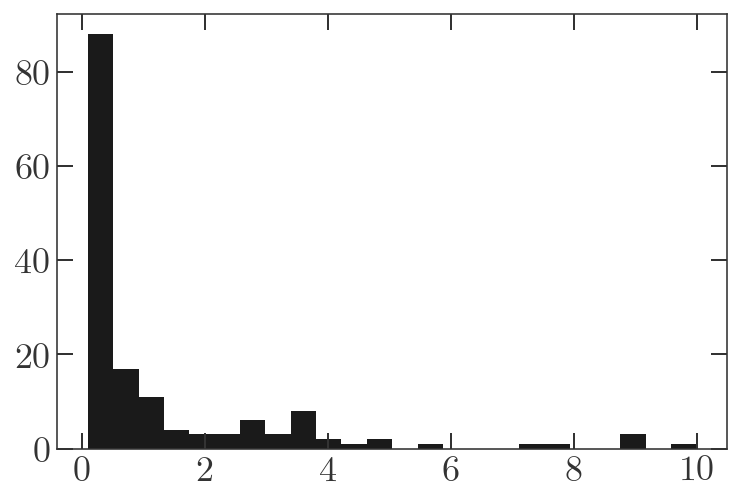

In [27]:
plt.hist(prvs, bins='auto');